In [1]:
from joblib import load
import tensorflow as tf
import rasterio
random_forest_model = load('random_forest_model.pkl')
svm_model = load('svm_model.pkl')
xgb_model = load('xgb_model.pkl')
nn_model = tf.keras.models.load_model('nn_model.keras')

import numpy as np
import rasterio
from rasterio import windows
from skimage.util import view_as_windows
from joblib import Parallel, delayed

%run crop_classify.ipynb
image_path = 'sample_input.tif'  # Adjust the file path if necessary
mask_path = 'water_mask.tif'  # Adjust the file path if necessary

#RF
try:
    print("Classifying via RF Model")
    classified_image_rf, src = classify_image(image_path, mask_path, random_forest_model)
except Exception as e:
    print(f'Error in execution: {e}')
else:
    # Save the classified image
    with rasterio.open(
            'sample_output_classified_image_RF.tif',
            'w',
            driver='GTiff',
            height=classified_image_rf.shape[0],
            width=classified_image_rf.shape[1],
            count=1,
            dtype=classified_image_rf.dtype,
            crs=src.crs,
            transform=src.transform,
        ) as dst:
            dst.write(classified_image_rf, 1)
print("Classified Image RF saved")

#SVM
try:
    print("Classifying via SVM Model")
    classified_image_svm, src = classify_image(image_path, mask_path, svm_model)
except Exception as e:
    print(f'Error in execution: {e}')
else:
    # Save the classified image
    with rasterio.open(
            'sample_output_classified_image_SVM.tif',
            'w',
            driver='GTiff',
            height=classified_image_svm.shape[0],
            width=classified_image_svm.shape[1],
            count=1,
            dtype=classified_image_svm.dtype,
            crs=src.crs,
            transform=src.transform,
        ) as dst:
            dst.write(classified_image_svm, 1)
print("Classified Image SVM saved")

#XGB
try:
    print("Classifying via XGB Model")
    classified_image_xgb, src = classify_image(image_path, mask_path, xgb_model)
except Exception as e:
    print(f'Error in execution: {e}')
else:
    # Save the classified image
    with rasterio.open(
            'sample_output_classified_image_XGB.tif',
            'w',
            driver='GTiff',
            height=classified_image_xgb.shape[0],
            width=classified_image_xgb.shape[1],
            count=1,
            dtype=classified_image_xgb.dtype,
            crs=src.crs,
            transform=src.transform,
        ) as dst:
            dst.write(classified_image_xgb, 1)
print("Classified Image XGB saved")

#NN
try:
    print("Classifying via NN Model")
    classified_image_nn, src = classify_image(image_path, mask_path, nn_model)
except Exception as e:
    print(f'Error in execution: {e}')
else:
    # Save the classified image
    with rasterio.open(
            'sample_output_classified_image_NN.tif',
            'w',
            driver='GTiff',
            height=classified_image_nn.shape[0],
            width=classified_image_nn.shape[1],
            count=1,
            dtype=classified_image_nn.dtype,
            crs=src.crs,
            transform=src.transform,
        ) as dst:
            dst.write(classified_image_nn, 1)

print("Classified Image NN saved")
print("Classified images saved successfully.")

Classifying via RF Model


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classified Image RF saved
Classifying via SVM Model


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Classified Image SVM saved
Classifying via XGB Model
Classified Image XGB saved
278158/278158 ━━━━━━━━━━━━━━━━━━━━ 491s 2ms/step
Error in execution: cannot reshape array of size 53406210 into shape (2743,3245)
Classified images saved successfully.


In [7]:
import matplotlib as plt
import matplotlib.pyplot as plt

def display_image(image_path, title):
    """Display a raster image."""
    with rasterio.open(image_path) as src:
        image = src.read(1)  # Assuming single-band TIF
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

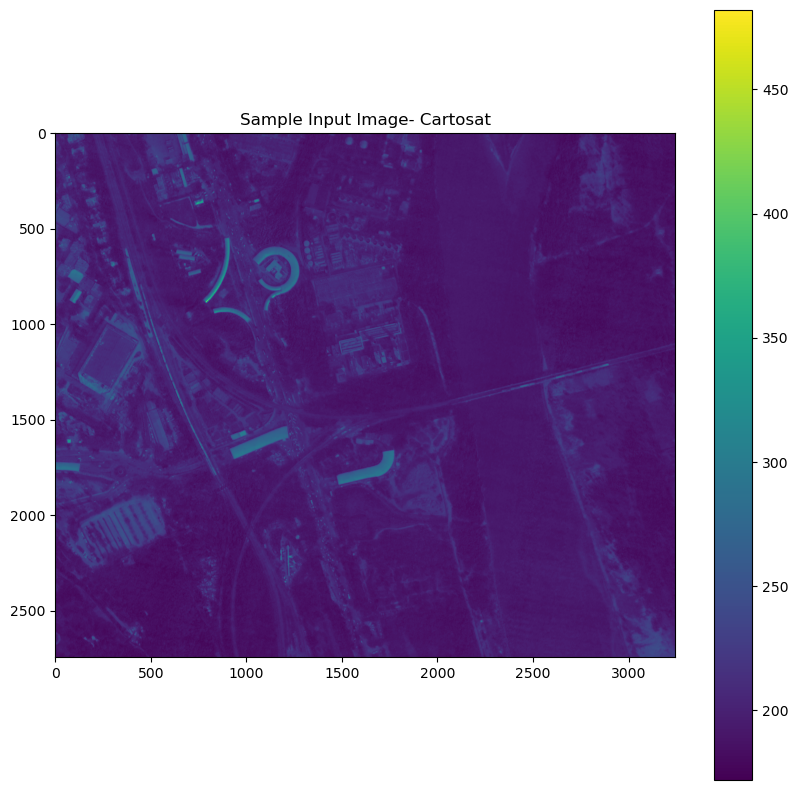

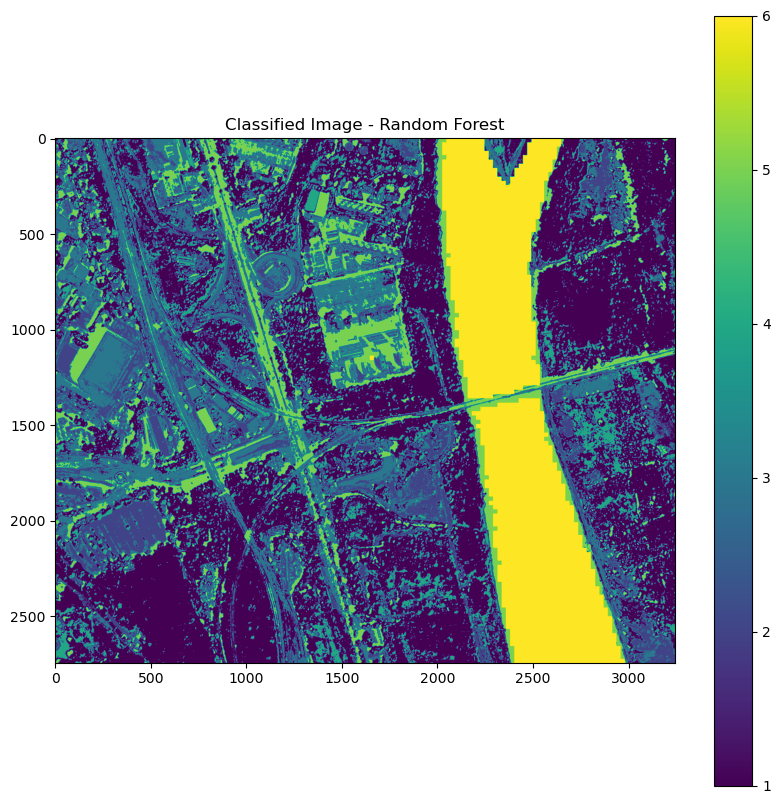

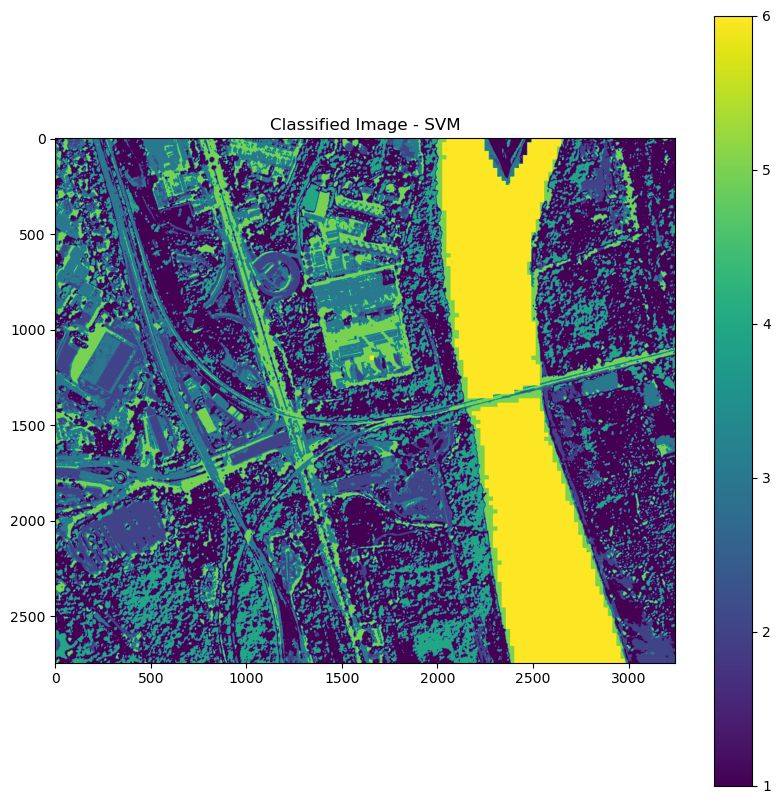

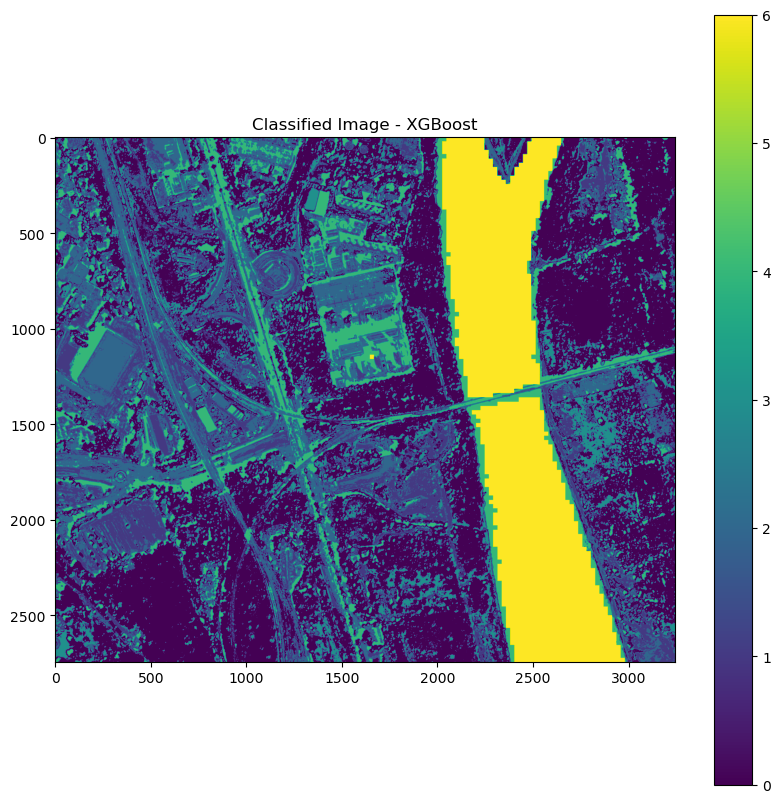

In [8]:
display_image(image_path, "Sample Input Image- Cartosat")

CLASSIFIED_OUTPUT_RF = "sample_output_classified_image_RF.tif"
CLASSIFIED_OUTPUT_SVM = "sample_output_classified_image_SVM.tif"
CLASSIFIED_OUTPUT_XGB = "sample_output_classified_image_XGB.tif"
#CLASSIFIED_OUTPUT_NN = "sample_output_classified_image_NN.tif"

display_image(CLASSIFIED_OUTPUT_RF, "Classified Image - Random Forest")
display_image(CLASSIFIED_OUTPUT_SVM, "Classified Image - SVM")
display_image(CLASSIFIED_OUTPUT_XGB, "Classified Image - XGBoost")
#display_image(CLASSIFIED_OUTPUT_NN, "Classified Image - Neural Network")